# Data Preparation and Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load Galton's height data
# In practice, you would load from a CSV file
# Here we'll simulate similar data based on Galton's findings

np.random.seed(42)
n_observations = 928

# Generate parent heights (approximately normal, mean ~68.5)
parent_heights = np.random.normal(68.5, 2.5, n_observations)

# Generate child heights with regression relationship + noise
# Child = 25.85 + 0.61 * Parent + error
child_heights = 25.85 + 0.61 * parent_heights + np.random.normal(0, 2.26, n_observations)

# Create DataFrame
galton_data = pd.DataFrame({
    'parent_ht': parent_heights,
    'child_ht': child_heights
})

# Display basic statistics
print("Galton Height Data - Descriptive Statistics")
print("=" * 50)
print(galton_data.describe())
print()

# Calculate correlation
correlation = galton_data['parent_ht'].corr(galton_data['child_ht'])
print(f"Correlation coefficient: {correlation:.4f}")

Galton Height Data - Descriptive Statistics
        parent_ht    child_ht
count  928.000000  928.000000
mean    68.558449   67.812422
std      2.442156    2.530478
min     60.396832   59.468396
25%     66.901038   66.081278
50%     68.571329   67.760165
75%     70.119860   69.529606
max     78.131829   75.119218

Correlation coefficient: 0.4680


# Regression Analysis

In [ ]:
# Method 1: Using statsmodels with formula API (R-like syntax)
print("\n" + "="*60)
print("METHOD 1: Using statsmodels formula API")
print("="*60)

# Fit the regression model using formula
model_formula = smf.ols('child_ht ~ parent_ht', data=galton_data)
results_formula = model_formula.fit()

# Print comprehensive results
print(results_formula.summary())

# Extract key statistics
print(f"\nKey Statistics (Formula API):")
print(f"Intercept (β₀): {results_formula.params['Intercept']:.4f}")
print(f"Slope (β₁): {results_formula.params['parent_ht']:.4f}")
print(f"R-squared: {results_formula.rsquared:.4f}")
print(f"Adjusted R-squared: {results_formula.rsquared_adj:.4f}")
print(f"Root Mean Square Error: {np.sqrt(results_formula.mse_resid):.4f}")
print(f"F-statistic: {results_formula.fvalue:.4f}")
print(f"F-statistic p-value: {results_formula.f_pvalue:.2e}")


METHOD 1: Using statsmodels formula API
                            OLS Regression Results                            
Dep. Variable:               child_ht   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     259.7
Date:                Mon, 25 Aug 2025   Prob (F-statistic):           1.10e-51
Time:                        19:52:50   Log-Likelihood:                -2063.1
No. Observations:                 928   AIC:                             4130.
Df Residuals:                     926   BIC:                             4140.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  


Regression Results
                            OLS Regression Results                            
Dep. Variable:               child_ht   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     259.7
Date:                Mon, 25 Aug 2025   Prob (F-statistic):           1.10e-51
Time:                        19:59:36   Log-Likelihood:                -2063.1
No. Observations:                 928   AIC:                             4130.
Df Residuals:                     926   BIC:                             4140.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5677      2.064

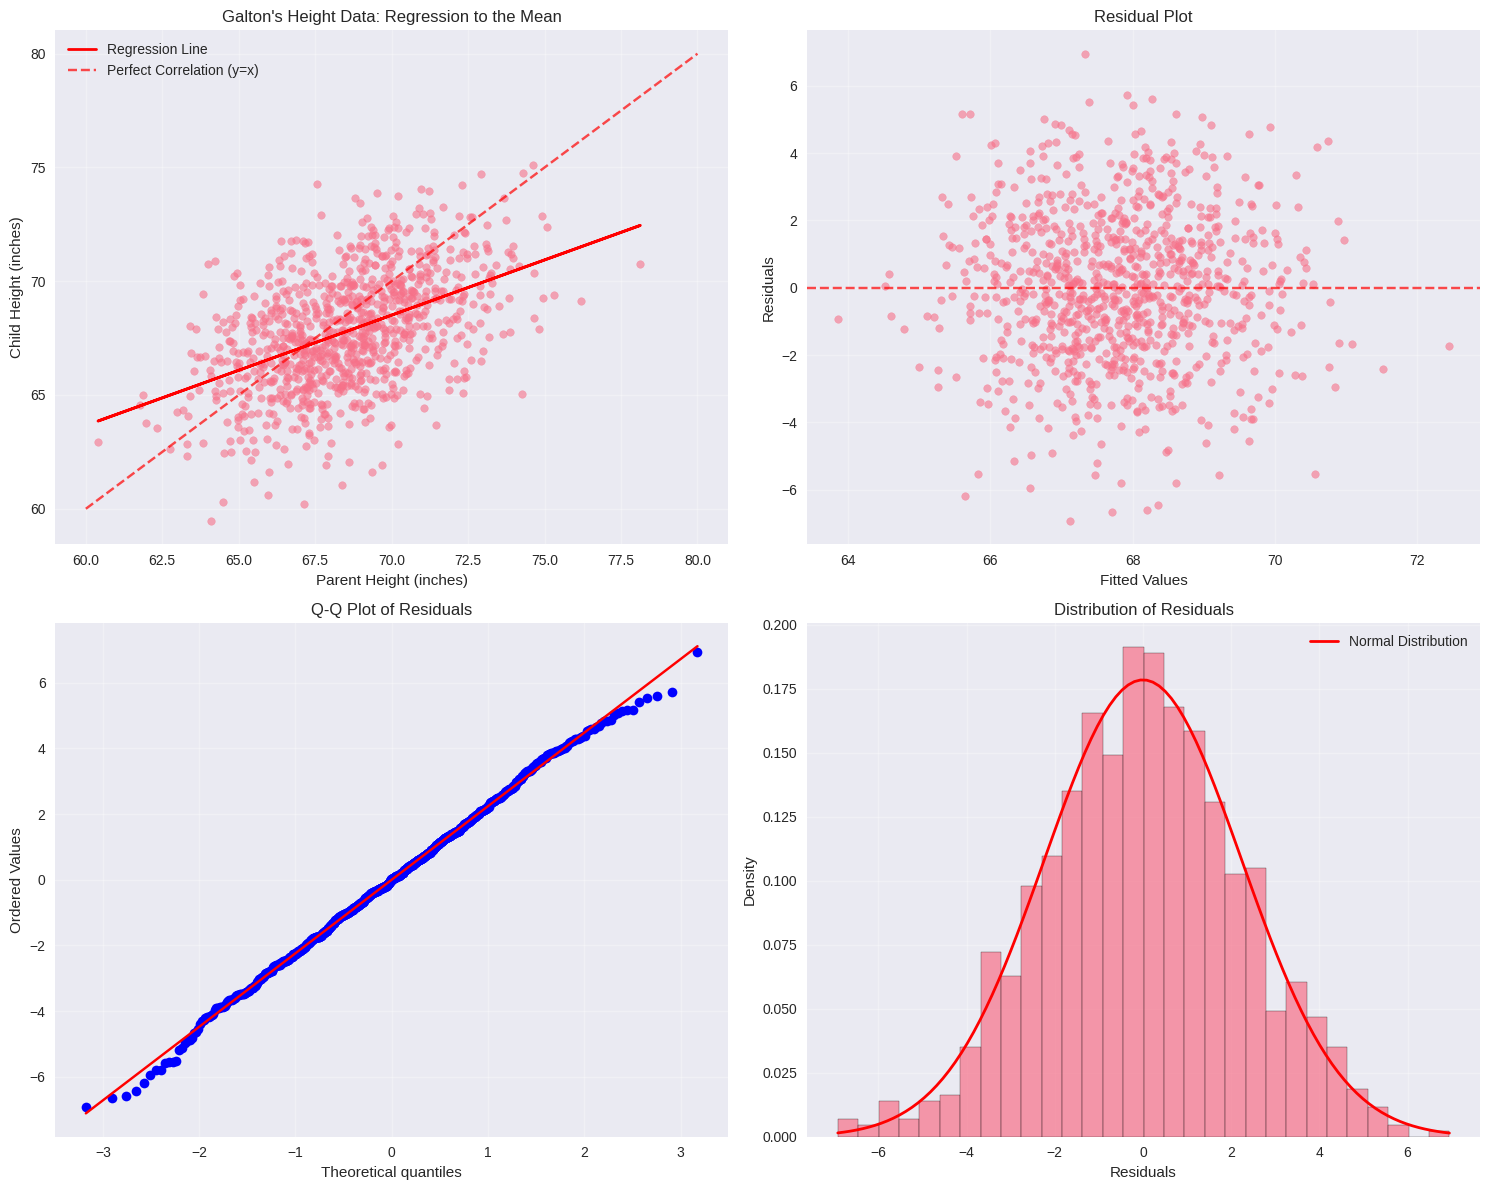


Assumption Tests:
------------------------------
Shapiro-Wilk Test for Normality:
  Statistic: 0.9985, p-value: 0.6024
  Interpretation: Residuals appear normal

Breusch-Pagan Test for Homoscedasticity:
  Statistic: 0.0039, p-value: 0.9500
  Interpretation: Homoscedastic

Durbin-Watson Test for Independence:
  Statistic: 2.0092
  Interpretation: No autocorrelation

Influence Diagnostics:
  Max Cook's Distance: 0.0215
  Number of high leverage points: 45

Key Insights:
1. Regression to the Mean: Slope = 0.485 < 1.0
2. For every 1 inch increase in parent height, child height increases by 0.485 inches on average
3. 21.9% of the variation in child height is explained by parent height

Prediction Example:
For parent height of 70.0 inches:
  Predicted child height: 68.51 inches
  Manual calculation check: 68.51 inches
  95% Prediction Interval: [64.12, 72.91]
  95% Confidence Interval for mean: [68.34, 68.68]


In [ ]:
# Prepare data for regression
X = galton_data[['parent_ht']]  # Feature matrix
y = galton_data['child_ht']     # Target variable

# Add constant (intercept) to the feature matrix
X_with_const = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X_with_const)
results = model.fit()

# Print comprehensive results
print("\nRegression Results")
print("=" * 50)
print(results.summary())

# Extract key statistics
print(f"\nKey Statistics:")
print(f"Intercept (β₀): {results.params['const']:.4f}")
print(f"Slope (β₁): {results.params['parent_ht']:.4f}")
print(f"R-squared: {results.rsquared:.4f}")
print(f"Adjusted R-squared: {results.rsquared_adj:.4f}")
print(f"Root Mean Square Error: {np.sqrt(results.mse_resid):.4f}")
print(f"F-statistic: {results.fvalue:.4f}")
print(f"F-statistic p-value: {results.f_pvalue:.2e}")

# Get predictions and residuals
y_pred = results.predict(X_with_const)
residuals = results.resid

# Additional diagnostics
print(f"\nAdditional Diagnostics:")
print(f"AIC: {results.aic:.2f}")
print(f"BIC: {results.bic:.2f}")
print(f"Log-likelihood: {results.llf:.2f}")
print(f"Condition number: {results.condition_number:.2f}")

# Statistical significance testing
print(f"\nStatistical Significance:")
print(f"Intercept - t-statistic: {results.tvalues['const']:.3f}, p-value: {results.pvalues['const']:.2e}")
print(f"Slope - t-statistic: {results.tvalues['parent_ht']:.3f}, p-value: {results.pvalues['parent_ht']:.2e}")

# Confidence intervals
conf_int = results.conf_int()
print(f"\n95% Confidence Intervals:")
print(f"Intercept: [{conf_int.loc['const', 0]:.4f}, {conf_int.loc['const', 1]:.4f}]")
print(f"Slope: [{conf_int.loc['parent_ht', 0]:.4f}, {conf_int.loc['parent_ht', 1]:.4f}]")

# Create comprehensive visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Scatter plot with regression line
ax1.scatter(galton_data['parent_ht'], galton_data['child_ht'], alpha=0.6, s=30)
ax1.plot(galton_data['parent_ht'], y_pred, color='red', linewidth=2, label='Regression Line')
ax1.plot([60, 80], [60, 80], 'r--', alpha=0.7, label='Perfect Correlation (y=x)')
ax1.set_xlabel('Parent Height (inches)')
ax1.set_ylabel('Child Height (inches)')
ax1.set_title('Galton\'s Height Data: Regression to the Mean')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Residual plot
ax2.scatter(y_pred, residuals, alpha=0.6, s=30)
ax2.axhline(y=0, color='red', linestyle='--', alpha=0.7)
ax2.set_xlabel('Fitted Values')
ax2.set_ylabel('Residuals')
ax2.set_title('Residual Plot')
ax2.grid(True, alpha=0.3)

# 3. Q-Q plot for residuals
stats.probplot(residuals, dist="norm", plot=ax3)
ax3.set_title('Q-Q Plot of Residuals')
ax3.grid(True, alpha=0.3)

# 4. Histogram of residuals
ax4.hist(residuals, bins=30, density=True, alpha=0.7, edgecolor='black')
x_norm = np.linspace(residuals.min(), residuals.max(), 100)
ax4.plot(x_norm, stats.norm.pdf(x_norm, residuals.mean(), residuals.std()),
         'r-', linewidth=2, label='Normal Distribution')
ax4.set_xlabel('Residuals')
ax4.set_ylabel('Density')
ax4.set_title('Distribution of Residuals')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Assumption tests
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import OLSInfluence

print(f"\nAssumption Tests:")
print("-" * 30)

# Get number of observations for later calculations
n_observations = len(galton_data)

# Normality test
shapiro_stat, shapiro_p = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test for Normality:")
print(f"  Statistic: {shapiro_stat:.4f}, p-value: {shapiro_p:.4f}")
print(f"  Interpretation: {'Residuals appear normal' if shapiro_p > 0.05 else 'Residuals may not be normal'}")

# Homoscedasticity test
bp_stat, bp_p, _, _ = het_breuschpagan(residuals, X_with_const)
print(f"\nBreusch-Pagan Test for Homoscedasticity:")
print(f"  Statistic: {bp_stat:.4f}, p-value: {bp_p:.4f}")
print(f"  Interpretation: {'Homoscedastic' if bp_p > 0.05 else 'Heteroscedastic'}")

# Independence test
dw_stat = durbin_watson(residuals)
print(f"\nDurbin-Watson Test for Independence:")
print(f"  Statistic: {dw_stat:.4f}")
print(f"  Interpretation: {'No autocorrelation' if 1.5 < dw_stat < 2.5 else 'Possible autocorrelation'}")

# Influence diagnostics
influence = OLSInfluence(results)
cook_d = influence.cooks_distance[0]
print(f"\nInfluence Diagnostics:")
print(f"  Max Cook's Distance: {cook_d.max():.4f}")
print(f"  Number of high leverage points: {sum(cook_d > 4/n_observations)}")

# Calculate key insights
slope = results.params['parent_ht']
print(f"\nKey Insights:")
print(f"1. Regression to the Mean: Slope = {slope:.3f} < 1.0")
print(f"2. For every 1 inch increase in parent height, child height increases by {slope:.3f} inches on average")
print(f"3. {results.rsquared*100:.1f}% of the variation in child height is explained by parent height")

# Fixed prediction example
print(f"\nPrediction Example:")
# Example prediction for parent height of 70 inches
example_parent_height = 70.0

# Create properly formatted input for prediction
example_input = np.array([[1, example_parent_height]])  # [intercept, parent_height]

# Make prediction
pred_mean = results.predict(example_input)[0]

# Alternative method using the fitted equation directly
intercept = results.params['const']
slope_coef = results.params['parent_ht']
pred_mean_manual = intercept + slope_coef * example_parent_height

print(f"For parent height of {example_parent_height} inches:")
print(f"  Predicted child height: {pred_mean:.2f} inches")
print(f"  Manual calculation check: {pred_mean_manual:.2f} inches")

# Calculate prediction intervals manually
# Standard error of prediction
X_mean = X['parent_ht'].mean()
n = len(X)
sum_sq_x = ((X['parent_ht'] - X_mean) ** 2).sum()

# Standard error for individual prediction
se_pred = np.sqrt(results.mse_resid * (1 + 1/n + (example_parent_height - X_mean)**2 / sum_sq_x))

# 95% prediction interval
t_critical = stats.t.ppf(0.975, df=results.df_resid)  # 97.5th percentile for 95% CI
margin_error = t_critical * se_pred

pi_lower = pred_mean - margin_error
pi_upper = pred_mean + margin_error

print(f"  95% Prediction Interval: [{pi_lower:.2f}, {pi_upper:.2f}]")

# Confidence interval for the mean (narrower than prediction interval)
se_mean = np.sqrt(results.mse_resid * (1/n + (example_parent_height - X_mean)**2 / sum_sq_x))
ci_margin = t_critical * se_mean
ci_lower = pred_mean - ci_margin
ci_upper = pred_mean + ci_margin

print(f"  95% Confidence Interval for mean: [{ci_lower:.2f}, {ci_upper:.2f}]")